In [1]:
import requests
import json
import csv
import pandas as pd
import numpy as np
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

In [2]:
# Data (Lina)
my_key = 'a385feb8f8766853786d7a499a13b406e5ef1ac3' # Paste the key here
browser = 'https://'
url = 'api.census.gov/data/timeseries/qwi/sa?get=Emp,EmpS,HirA,EarnS,Sep&time=from 2010-Q1 to 2012-Q4&for=state:39,42,18,21,54&sex=1&sex=2&agegrp=A02&agegrp=A07&ownercode=A00&seasonadj=U&industry=11&industry=21&industry=22&industry=23&industry=42&industry=51&industry=52&industry=53&industry=54&industry=55&industry=56&key='
api_address = browser + url + my_key
data = requests.get(api_address).json()
names = data[0]

df = pd.DataFrame(data[1:], columns = names)

# df.to_csv('data_lodes.csv') # Saved as csv
print(df.head(5))

    Emp EmpS HirA EarnS Sep     time sex agegrp ownercode seasonadj industry  \
0   468  404  129  1425  94  2010-Q1   1    A02       A00         U       11   
1  1043  993   89  3412  67  2010-Q1   1    A07       A00         U       11   
2   135  114   63  1040  38  2010-Q1   2    A02       A00         U       11   
3   445  409   61  2063  43  2010-Q1   2    A07       A00         U       11   
4    91   86   10  3241   8  2010-Q1   1    A02       A00         U       21   

  state  
0    18  
1    18  
2    18  
3    18  
4    18  


In [12]:
type(df["sex"])

pandas.core.series.Series

In [3]:
#Subset variables to plot in a 2 dimensional dataframe
plet = df.loc[:, ["time","Emp"]]
plet["Emp"] = plet["Emp"].astype('float')

#Vizualize what the new dataset looks like
plet_qtr = plet.groupby(["time"])[["Emp"]].sum()

print(plet_qtr)

              Emp
time             
2010-Q1  788385.0
2010-Q2  819900.0
2010-Q3  865219.0
2010-Q4  853955.0
2011-Q1  830138.0
2011-Q2  861917.0
2011-Q3  910440.0
2011-Q4  900780.0
2012-Q1  870094.0
2012-Q2  900897.0
2012-Q3  943369.0
2012-Q4  929962.0


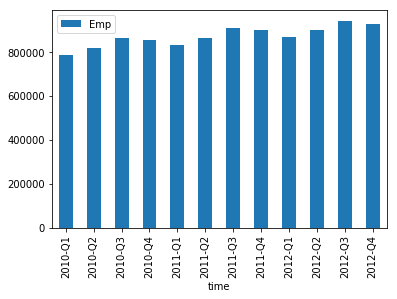

In [4]:
plet_qtr.plot.bar()

Text(0.5,0,'Number of Jobs')

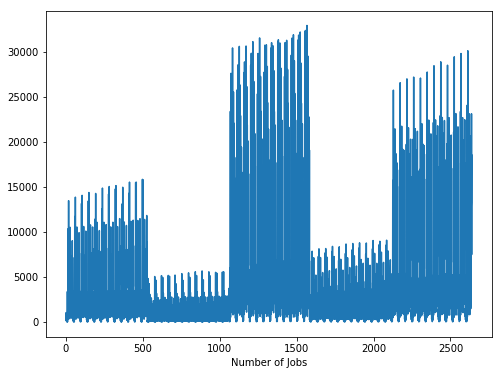

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
plet['Emp'].plot(kind="line",ax=ax)
ax.set_xlabel("Number of Jobs")

KeyError: 1

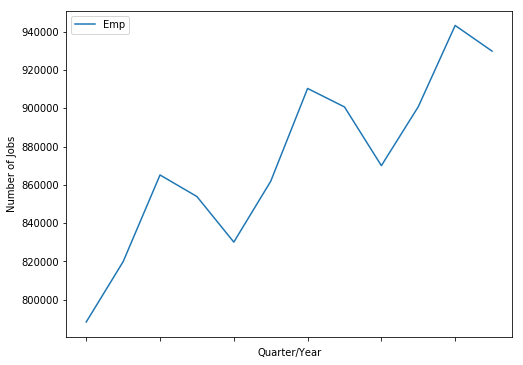

In [64]:
# Now to plot
fig, ax = plt.subplots(figsize=(8,6))

# Add each plot
plet_qtr.plot(kind='line', ax=ax, legend=True)

#label the axis' to look nicer
ax.set_ylabel("Number of Jobs")
ax.set_xlabel("Quarter/Year")

plt.xticks(np.arange(min(plet_qtr[1]), max(plet_qtr[1])+1, 1.0))

#Attempting to set the time ticks 
group_labels = ['2010-Q1', '2010-Q2',
                '2010-Q3', '2010-Q4',
                '2011-Q1', '2011-Q2', 
                '2011-Q3', '2011-Q4',
                '2012-Q1', '2012-Q2', 
                '2012-Q3', '2012-Q4']

ax.set_xticklabels(group_labels)

In [39]:
#making a group-by for gender to view job change as a subset
gender = df.loc[:, ["time","Emp","sex"]]
gender2 = pd.to_numeric(gender["Emp"], errors = 'coerce')

print(gender.describe())

           time   Emp   sex
count      2640  2640  2640
unique       12  2018     2
top     2012-Q3     6     2
freq        220     7  1320


TypeError: Empty 'DataFrame': no numeric data to plot

In [78]:

#making a group-by for gender to view job change as a subset
gender = df.loc[:, ["time","Emp","sex"]]
gender["Emp"] = gender["Emp"].astype('float')
gender["sex"] = gender["sex"].astype('str')

print(gender.head(5))

      time     Emp sex
0  2010-Q1   468.0   1
1  2010-Q1  1043.0   1
2  2010-Q1   135.0   2
3  2010-Q1   445.0   2
4  2010-Q1    91.0   1


                  Emp
time    sex          
2010-Q1 1    457868.0
        2    330517.0
2010-Q2 1    480060.0
        2    339840.0
2010-Q3 1    516464.0


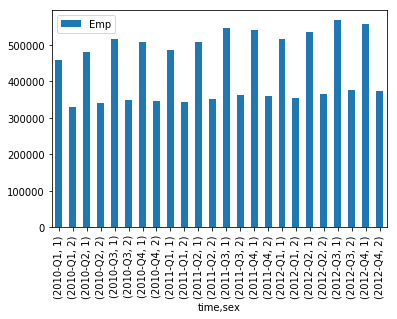

In [83]:
#group by sex AND time, summarizing Employment counts
gender_time = gender.groupby(["time","sex"])[["Emp"]].sum()
gender_time.plot.bar()
print(gender_time.head(5))

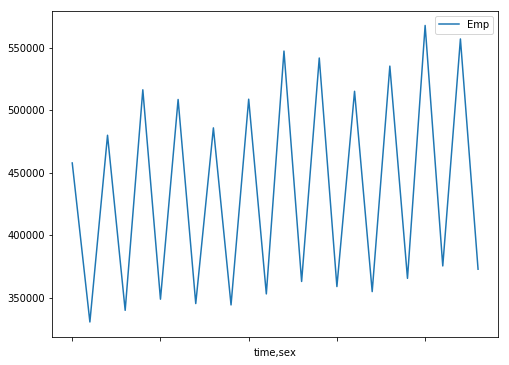

In [82]:
# Now to plot
fig, ax = plt.subplots(figsize=(8,6))

# Add each plot
gender_time.Emp.plot(kind='line', ax=ax, legend=True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

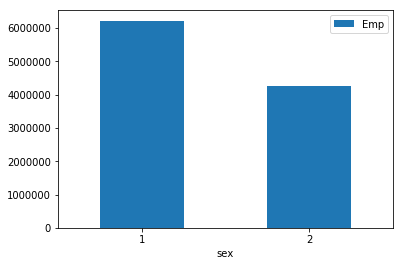

In [56]:
#Vizualize what the new dataset looks like
gender_plt = gender.groupby(["sex"])[["Emp"]].sum()

gender_plt.plot.bar()

#rotate the ticks to look nice
plt.xticks(rotation=0)

IndexError: too many indices for array

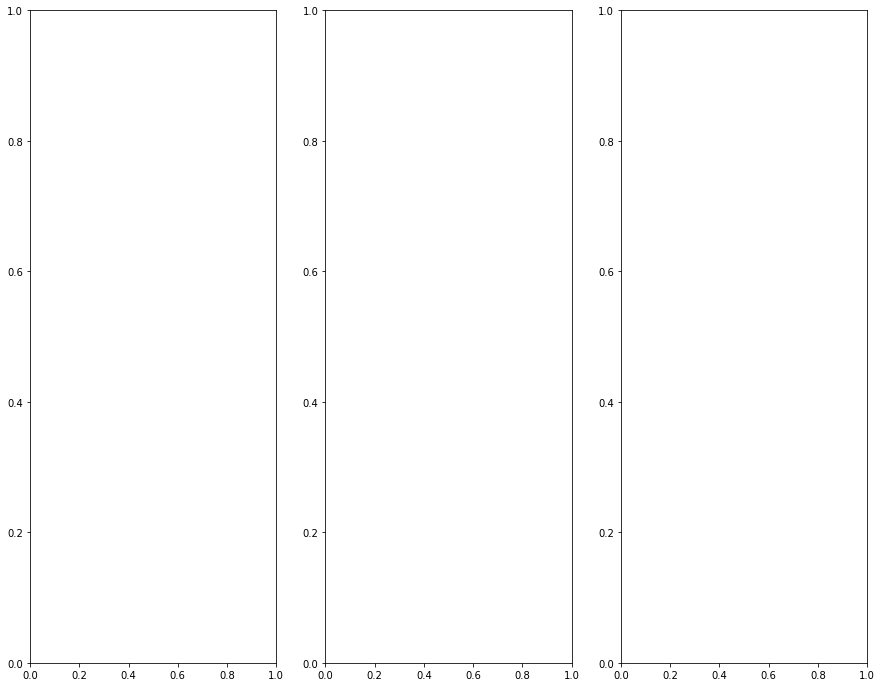

In [90]:
from itertools import combinations
import matplotlib.pyplot as plt

pairs = list(combinations(gender.columns, 2))

fig, axes = plt.subplots(len(pairs) // 3, 3, figsize=(15, 12))
for i, pair in enumerate(pairs):
    d = gender[list(pair)]
    ax = axes[i // 3, i % 3]
    d.plot.scatter(*pair, ax=ax)

fig.tight_layout()

In [72]:
print(type(gender["time"]))
print(type(gender["sex"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
